# Handle images

In [1]:
from eccore.ipython import nb_setup
nb_setup()

from pathlib import Path
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from fastai.vision.all import *

from utils import ROOT, DATASETS

%matplotlib inline

Added path: /home/vtec/projects/bio/mpox-prestudy/src
Set autoreload mode


In [2]:
p2imgs = DATASETS['ipp-original']['path']
imgs = get_image_files(p2imgs)
imgs.__len__()

9

JPEG RGB (780, 1040)


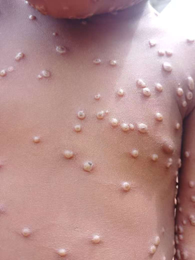

JPEG RGB (780, 1040)


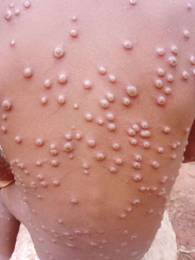

JPEG RGB (780, 1040)


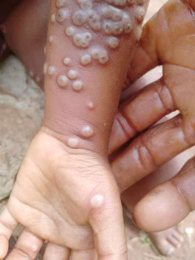

JPEG RGB (744, 992)


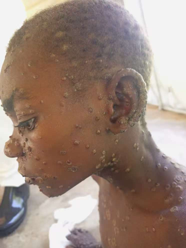

JPEG RGB (744, 992)


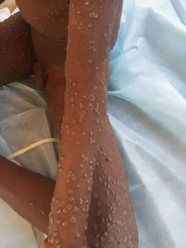

JPEG RGB (744, 992)


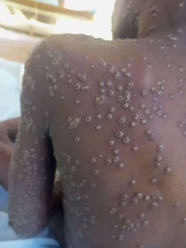

JPEG RGB (1080, 1080)


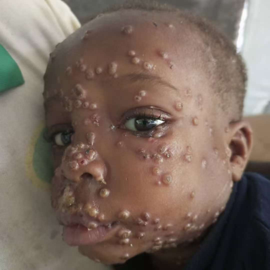

JPEG RGB (744, 992)


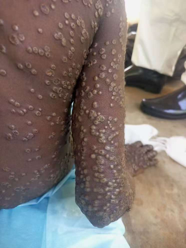

JPEG RGB (780, 1040)


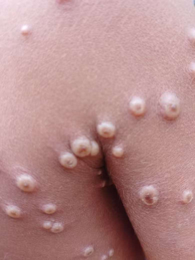

In [3]:
for file in imgs:
    img = Image.open(file)
    print(img.format, img.mode, img.size)
    display(img.resize(img.size//4))


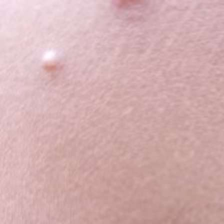

In [4]:
box = (0,0,224,224)
region = img.resize(img.size//2).crop(box)
region

## General View

original (780, 1040)


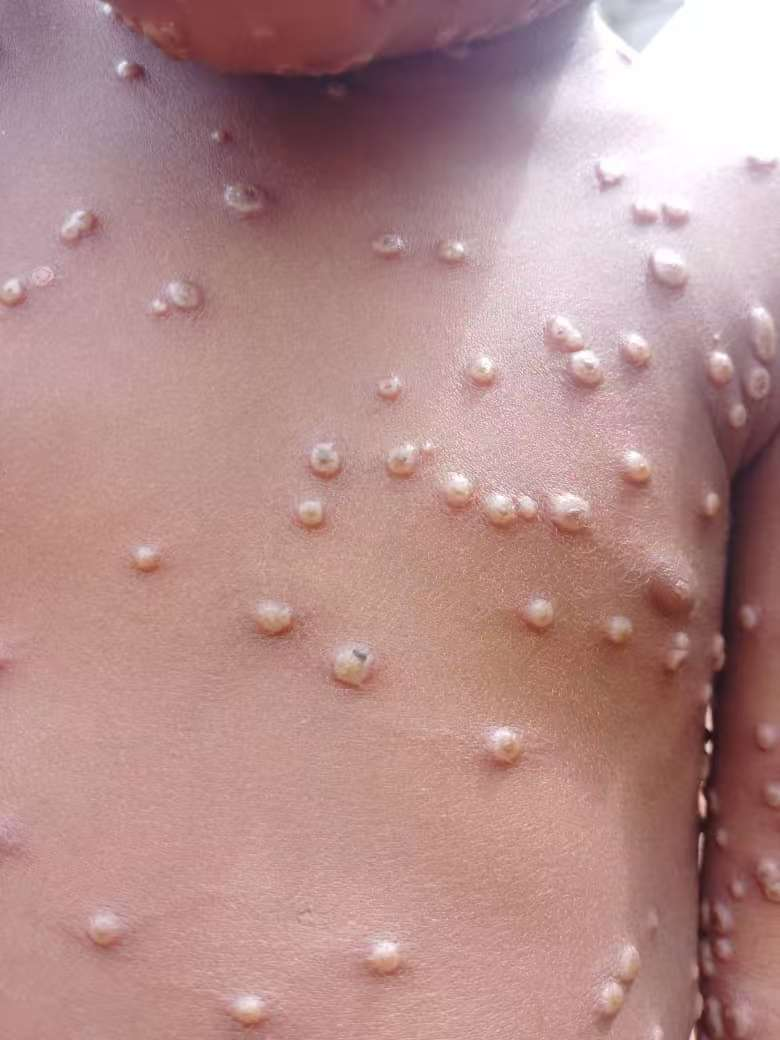

- contain (168, 224)


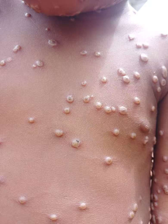

- cover (224, 299)


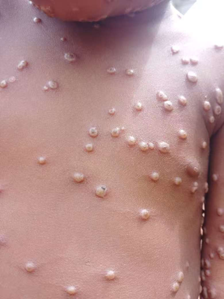

- fit (224, 224)


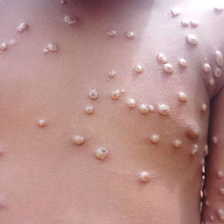

In [5]:
for file in imgs:
    img = Image.open(file)
    contain = ImageOps.contain(img, (224,224))
    cover = ImageOps.cover(img, (224,224))
    fit = ImageOps.fit(img, (224,224))
    print('original', img.size)
    display(img)
    print('- contain', contain.size)
    display(contain)
    print('- cover', cover.size)
    display(cover)
    print('- fit', fit.size)
    display(fit)
    break

(224, 299)
(224, 224)


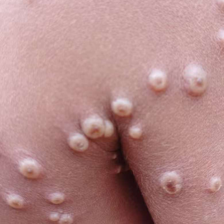

In [6]:
img = ImageOps.cover(Image.open(imgs[8]),(224,224))
print(img.size)
o = random.uniform(0,img.size[1]-224)
box = (0,o,224,224+o)
reduced = img.crop(box)
print(reduced.size)
reduced

In [12]:
p2target_dir = DATASETS['ipp-augmented']['path']/'Monkeypox'
assert p2target_dir.is_dir()
p2target_dir

Path('/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox')

20250828085756_60.jpg


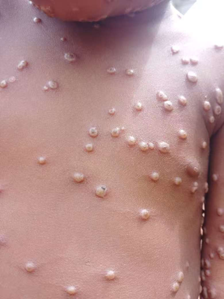

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_00.jpg 

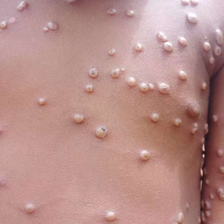

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_01.jpg 

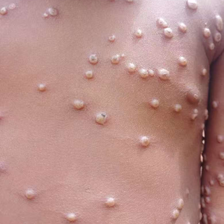

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_02.jpg 

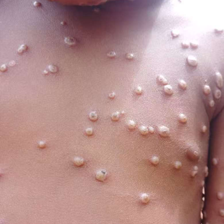

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_03.jpg 

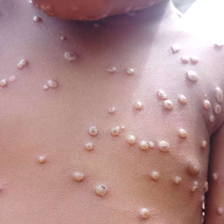

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_04.jpg 

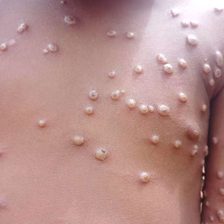

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_05.jpg 

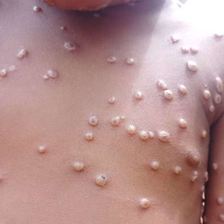

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_06.jpg 

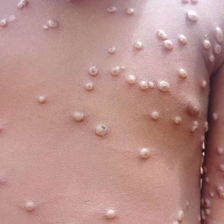

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_07.jpg 

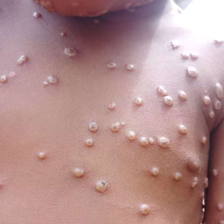

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_08.jpg 

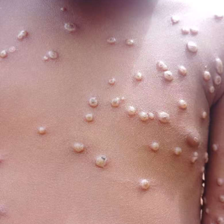

/home/vtec/projects/bio/mpox-prestudy/data/ipp/augmented/Monkeypox/20250828085756_60_general_09.jpg 

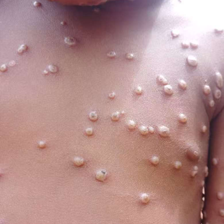

  done


In [16]:
fname_seed = 'general'
SAVE_NEW_FILES = False

for file in imgs:
    print(file.name)
    img = ImageOps.cover(Image.open(file), (224,224))
    display(img)
    # create 10 global images
    for i in range(10):
        offset = random.uniform(0,img.size[1]-224)
        assert offset <= img.size[1]-224
        box = (0,offset,224,224+offset)
        cropped = img.crop(box)
        p2new_file = p2target_dir/f"{file.stem}_{fname_seed}_{i:02d}{file.suffixes[0]}"
        if SAVE_NEW_FILES: cropped.save(p2new_file)
        else: 
            print(p2new_file, end=' ')
            display(cropped)
    print('  done')
    if not SAVE_NEW_FILES: break

In [264]:
# for file in p2augmented.iterdir():
#     file.unlink()

20250828085704_55_general_09.jpg (224, 224)


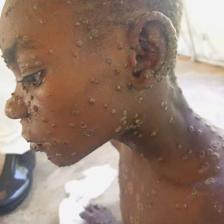

In [17]:
for file in p2target_dir.iterdir():
    img = Image.open(file)
    print(file.name, img.size)
    display(img)
    break